# Mia Tarantola

# Introduction


In this blog post I will deepen my understanding of linear regression by implementing least-squares linear regression in two different ways

> - Analytic
> - Gradient descent

I will also implement a scoring function to report the accuracy of the model

I will also perform experiments to test the limits of the algorithms and compare the two methods. 

I will also compare and contrast purley linear regression models with LASSO regularization models.

# Imports and Basic Functions

In [1]:
import LR
from LR import LinearRegression
import numpy as np
from matplotlib import pyplot as plt

%reload_ext autoreload
%autoreload 2


In [2]:

def pad(X):
    return np.append(X, np.ones((X.shape[0], 1)), 1)

def LR_data(n_train = 100, n_val = 100, p_features = 1, noise = .1, w = None):
    if w is None: 
        w = np.random.rand(p_features + 1) + .2
    
    X_train = np.random.rand(n_train, p_features)
    y_train = pad(X_train)@w + noise*np.random.randn(n_train)

    X_val = np.random.rand(n_val, p_features)
    y_val = pad(X_val)@w + noise*np.random.randn(n_val)
    
    return X_train, y_train, X_val, y_val

## Analytic Approach

The analytic apporach makes use of the definition of convergence during gradient descent. At the minimum, $\nabla L(w) = 0$. Setting this equal to our expression for $\nabla L(w)$ gives $0 = X^{T}(X~\hat{w} -y)$. Solving for $\hat{w}$ gives $\hat{w} = (X^{T}X)^{-1}X^{T}y$, which can bed used to directly solve for $\hat{w}$ assuming X is padded. Now lets test the approach and generate some data

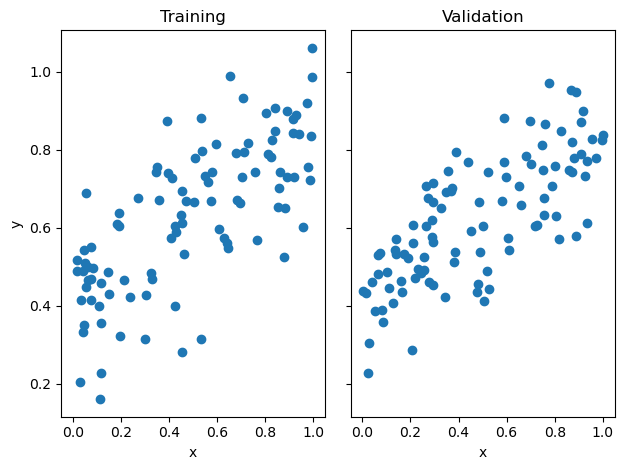

In [3]:
p_features = 1.

n_train = 100
n_val = 100
p_features = 1
noise = 0.13

# create some data
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)

# plot it
fig, axarr = plt.subplots(1, 2, sharex = True, sharey = True)
axarr[0].scatter(X_train, y_train)
axarr[1].scatter(X_val, y_val)
labs = axarr[0].set(title = "Training", xlabel = "x", ylabel = "y")
labs = axarr[1].set(title = "Validation", xlabel = "x")
plt.tight_layout()


Now that we have our data, let's train a model with the corresponding training data. 
For the first step of the function, I padded X_train the plugged it into the equation

In [4]:
LR_analytic = LinearRegression()

In [5]:
LR_analytic.fit_analytic(X_train,y_train)

Let's plot our new model

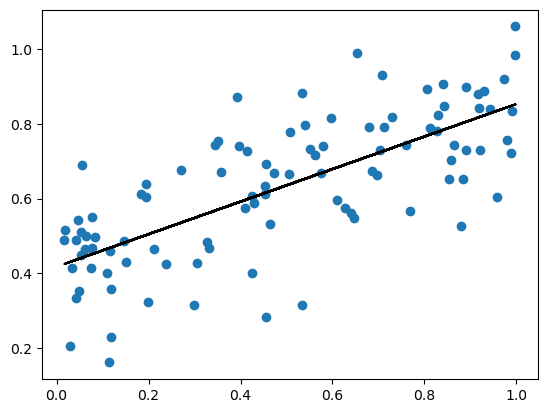

In [6]:
plt.scatter(X_train,y_train)
plt.plot(X_train,pad(X_train)@LR_analytic.w, color="black")

We can see that this model produces a pretty good fit forour data. It roughly follows the positive linear pattern of our data, but let's look at the accuracy to get a better idea of performance

In [7]:
print(f"Training score = {LR_analytic.score(pad(X_train),y_train).round(4)}")
print(f"Validation score = {LR_analytic.score(pad(X_val),y_val).round(4)}")

Training score = 0.5225
Validation score = 0.5491


Our accuracies are pretty good considering the coefficient of determination is always no larger than 1 and can be arbitrarily negative for very bad models.

## Gradient Descent Approach

Now let's look at the gradient descent approach. This approach makes use of the gradient function $\nabla L(w) = 2X^{T}(Xw-y)$. We use this during the repeadted iteration of 
$$w^{(t+1)} \leftarrow w^{(t)} - 2\alpha X^{T}(Xw^{(t)} -y)$$
we iterate until we hit the max number of iterations or until the gradient =0. We also track the score over the iterations. Let's use the same data to compare our results

In [8]:
LR_gradient = LinearRegression()
LR_gradient.fit_grad(X_train,y_train)


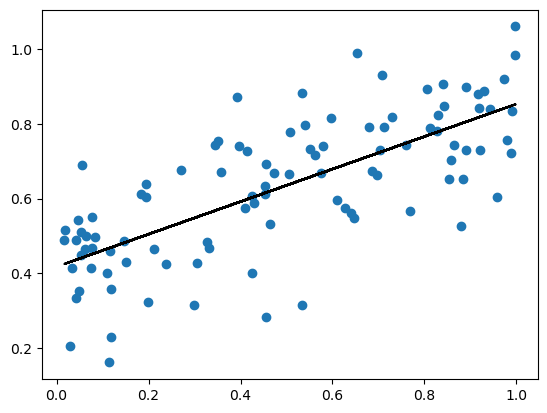

In [9]:
plt.scatter(X_train,y_train)
plt.plot(X_train, pad(X_train)@LR_gradient.w, color="black")

once again we can see that model does a good job predicting as the resulting line follows the positive linear pattern of the training data. Let's look at the accuracy

In [10]:
print(f"Training score = {LR_gradient.score(pad(X_train),y_train).round(4)}")
print(f"Validation score = {LR_gradient.score(pad(X_val),y_val).round(4)}")

Training score = 0.5225
Validation score = 0.5491


These scores are once again pretty good considering the scores max is 1 and can be arbitrarily negative for bad models. It also a good sign that the scores are the same as the analytic approach! Now, let's look at the score progression.

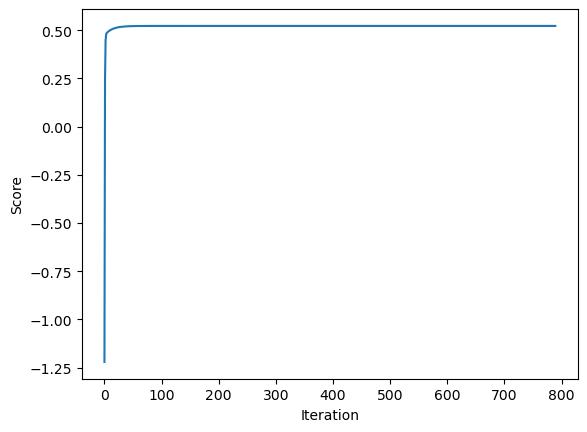

In [11]:
plt.plot(LR_gradient.score_history)
labels = plt.gca().set(xlabel = "Iteration", ylabel = "Score")

As expected, we see that our model started off with low accuracy, but quickly achieve a higher accuracy!

## Experiments

In [12]:
p_features_exp = [2,50,100,150,170,180,190,199]

n_train = 200
n_val = 200
noise = 0.1
training_scores=[]
val_scores=[]

# create some data

for p in p_features_exp:
    X_train_exp, y_train_exp, X_val_exp, y_val_exp = LR_data(n_train, n_val, p, noise)
    # print( X_train_exp[:5])
    LR_exp1 = LinearRegression()
    LR_exp1.fit_analytic(X_train_exp,y_train_exp)
    training_scores.append(LR_exp1.score(pad(X_train_exp),y_train_exp).round(4))
    val_scores.append(LR_exp1.score(pad(X_val_exp),y_val_exp).round(4))



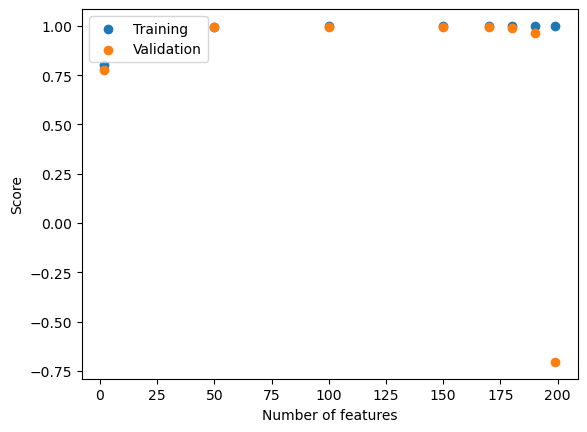

In [13]:

fig1 = plt.scatter(p_features_exp,training_scores)
plt.scatter(p_features_exp,val_scores)
plt.xlabel("Number of features")
plt.ylabel("Score")
plt.legend(["Training","Validation"])

This trend makes sense to me. Training a model is fairly easy and thus it is fairly easy to achieve a high accurcay/score for your training data. So, a pretty flat but high training accuracy was expected. The validation score is what matters as it shows how the model will perform on new data. The model starts of with a realtivelhy low vlaidation accuracy and it increases until the number of features is very similar to the number of data points. This is due to over fitting. As more features are added to our data, the model becomes increasingly complex, having to account for more and more properties. While it is complex, the training accruacy is still high as the model was trained on the data that it is evaluating. As we introduce new data (val data) the model has been over fitting the data (increasingly complex to fit the training data), so the model is so complex and specific to the training data that it is not performing well on the validation data. 

## LASSO REGULARIZATION

In [14]:
#importing from scikit learn

from sklearn.linear_model import Lasso
L = Lasso(alpha = 0.001)

In [15]:

p_features_exp2 = [2,50,100,150,170,180,190,199, 210, 220]

n_train2 = 200
n_val2 = 200
noise = 0.1
training_scores2=[]
val_scores2=[]

# create some data

for p in p_features_exp2:
    X_train_exp2, y_train_exp2, X_val_exp2, y_val_exp2 = LR_data(n_train2, n_val2, p, noise)

    L.fit(X_train_exp2,y_train_exp2)
    training_scores2.append(L.score(X_train_exp2,y_train_exp2).round(4))
    val_scores2.append(L.score(X_val_exp2,y_val_exp2).round(4))

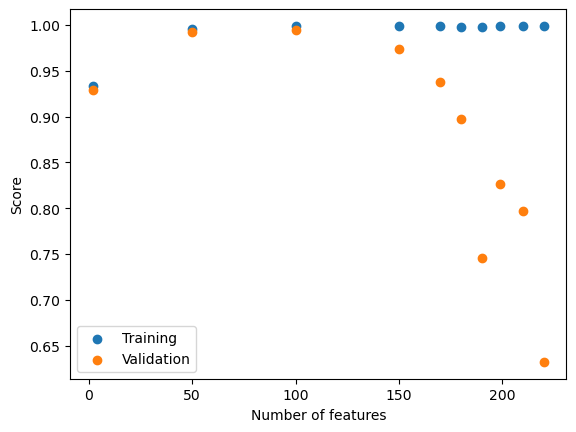

In [16]:
fig2 = plt.scatter(p_features_exp2,training_scores2)
plt.scatter(p_features_exp2,val_scores2)
plt.xlabel("Number of features")
plt.ylabel("Score")
plt.legend(["Training","Validation"])

The training scores look to be about the same as the scores generated from the linear regression model. That being relatively stable and high. The validation scores show a bit of a different pattern than the scores from purely LR model. In the LR model scores, the val scores remained high until just before p = n. The LASSO regularization model shows more of gradual decrease in validation accuracy. The model seems to hit its validation accuracy peak around p=n/2 and starts a steady decline for larger Ps. However, the validation accuracy for p=n-1 is larger with the LASSO model in comparison to purely LR